# Predicting Indian Liver Patient

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
liver_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/liver_patient_data/indian_liver_patient_dataset.csv')

In [109]:
liver_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [110]:
liver_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,500.0,44.586000,16.533400,4.0,32.750,45.0,58.00,85.0
Total_Bilirubin,500.0,2.603800,5.120238,0.4,0.800,0.9,2.20,75.0
Direct_Bilirubin,500.0,1.117200,2.066709,0.1,0.200,0.3,1.00,14.2
Alkaline_Phosphotase,500.0,296.372000,257.461676,63.0,175.000,205.5,298.00,2110.0
Alamine_Aminotransferase,500.0,82.736000,194.366775,10.0,23.000,33.5,59.25,2000.0
Aspartate_Aminotransferase,500.0,108.820000,307.093557,10.0,24.750,40.0,79.25,4929.0
Total_Protiens,500.0,6.444800,1.089020,2.7,5.700,6.5,7.20,9.6
Albumin,500.0,3.168800,0.799741,0.9,2.600,3.1,3.80,5.5
Albumin_and_Globulin_Ratio,496.0,0.960907,0.294289,0.3,0.795,1.0,1.10,1.9
Liver_Problem,500.0,1.300000,0.458717,1.0,1.000,1.0,2.00,2.0


In [111]:
# Encode male as 1 and female as -1

liver_data["Male"] = liver_data["Gender"].map({"Male":1, "Female":0})

In [112]:
#drop the gender column

liver_data = liver_data.drop(columns=["Gender"])

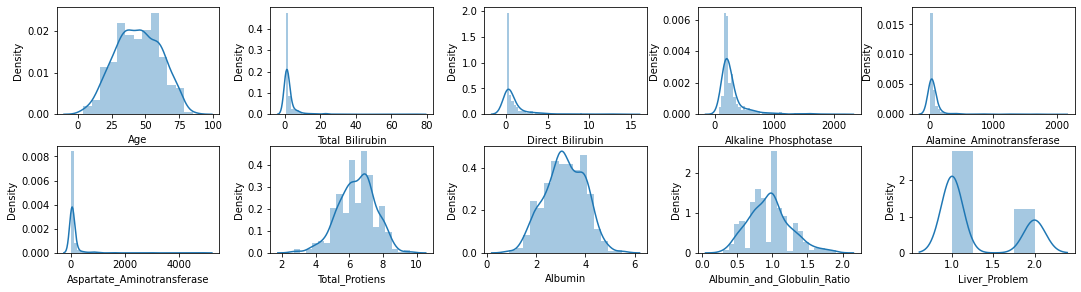

In [113]:
plot_rows = 2
plot_columns = 5

fig, ax = plt.subplots(nrows = plot_rows, ncols= plot_columns, figsize=(15, 4))
plt.tight_layout()

index = 0
cols = liver_data.columns

for i in range(plot_rows):
    for j in range(plot_columns):
        sns.distplot(liver_data[cols[index]], ax = ax[i, j])
        index = index + 1;

In [114]:
liver_data.isna().sum()

Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Liver_Problem                 0
Male                          0
dtype: int64

In [115]:
# have null values in "Albumin_and_Globulin_Ratio" variable. 
# replace null with mean of the variable

mean = liver_data["Albumin_and_Globulin_Ratio"].mean()
liver_data["Albumin_and_Globulin_Ratio"] = liver_data["Albumin_and_Globulin_Ratio"].fillna(mean)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem,Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,1


In [116]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler()

#create features and target

X = liver_data.drop(columns=["Liver_Problem"])
y = liver_data["Liver_Problem"]

#test-train-split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Standardize data and train
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

LogisticRegression()